In [2]:
import os
import sys
import importlib
os.chdir("../..")
directory_path = os.path.abspath(os.path.join("src"))
if directory_path not in sys.path:
    sys.path.append(directory_path)

import EyeTraumaAnalysis

In [2]:
importlib.reload(EyeTraumaAnalysis);

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

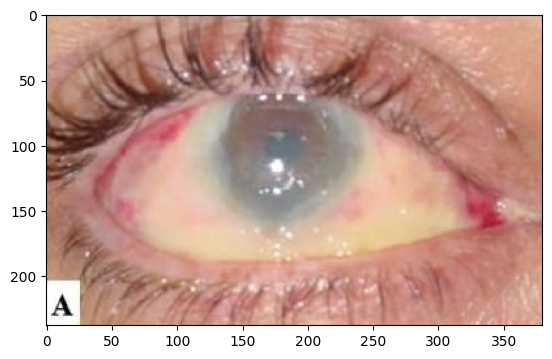

In [3]:
image = EyeTraumaAnalysis.Image("data/01_raw/00001_li.jpg")
plt.imshow(image.img);

In [4]:
segments = EyeTraumaAnalysis.get_segments(
    img=image.img,
    interval_deg=10,
    wd_px=20,
    center=image.center )

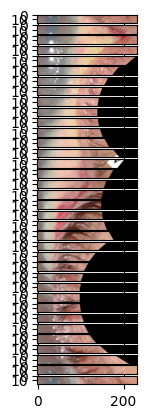

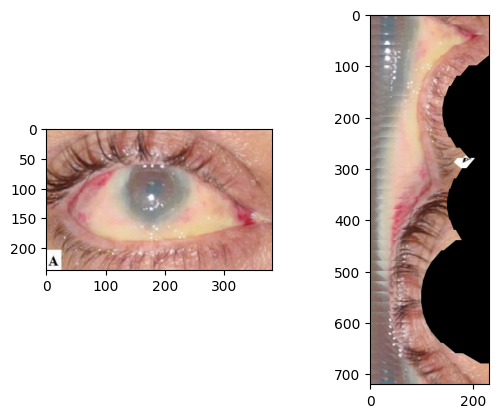

In [6]:
fig, axs = plt.subplots(len(segments), 1, sharex=True, sharey=True)
for ind, (deg, segment) in enumerate(segments.items()):
    axs[ind].imshow(segment)

fig, axs = plt.subplots(1,2)
axs[0].imshow(image.img);
axs[1].imshow(np.vstack([segment for ind,segment in segments.items()]));


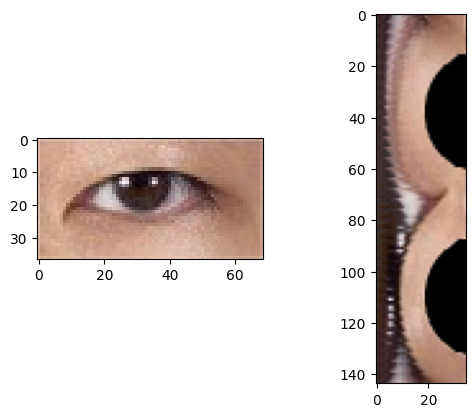

In [7]:
image = EyeTraumaAnalysis.Image("data/01_raw/10001.jpg")

segments = EyeTraumaAnalysis.get_segments(
    img=image.img,
    interval_deg=10,
    wd_px=4,
    center=image.center )

fig, axs = plt.subplots(1,2)
axs[0].imshow(image.img);
axs[1].imshow(np.vstack([segment for ind,segment in segments.items()]));
